In [4]:

pip install yfinance


[*********************100%***********************]  1 of 1 completed


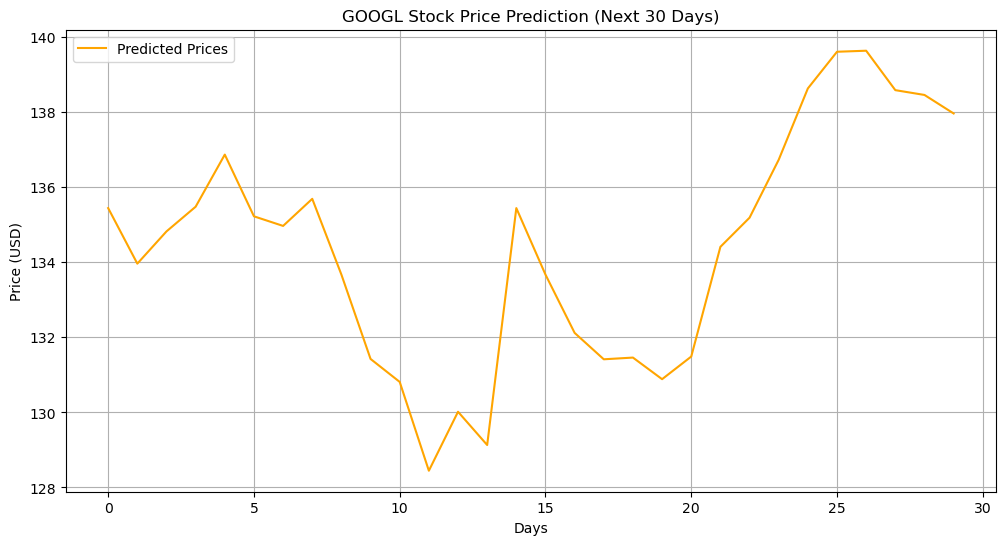

Data saved as: GOOGL_stock_data.csv


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Download GOOGL stock data
ticker = 'GOOGL'
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Step 2: Prepare data
data = data[['Close']]
data['Prediction'] = data[['Close']].shift(-30)  # Forecast 30 days ahead

# Step 3: Features and labels
X = data[['Close']][:-30]
y = data['Prediction'][:-30]

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict next 30 days
X_forecast = data[['Close']][-30:]
forecast = model.predict(X_forecast)

# Step 7: Plot predictions
plt.figure(figsize=(12, 6))
plt.title(f"{ticker} Stock Price Prediction (Next 30 Days)")
plt.plot(forecast, label="Predicted Prices", color='orange')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Step 8 (Optional): Save the data
data.to_csv(f"{ticker}_stock_data.csv")
print("Data saved as:", f"{ticker}_stock_data.csv")
